# Initial EDA

This Notebook outlines the initial EDA carried out on the LOB data. Initially the code has been written on a small sample of the full LOB dataset. To ensure no trends or outliers are missed this EDA will need to be run against the full dataset.

In [12]:
import pandas as pd


In [13]:
# Read in sample data
sample_csv = 'data/output/EDA_lob_output_data_sample.csv' # define path to sampel data

lob_sample = pd.read_csv(sample_csv)

In [14]:
# Reorder columns - this makes data and timestamp easier to read
desired_column_order = ['Timestamp', 'Date', 'Exchange', 'Bid', 'Ask', 'Mid_Price']
lob_sample = lob_sample[desired_column_order]
lob_sample.head()

,Timestamp,Date,Exchange,Bid,Ask,Mid_Price
0,0.000,2025-01-02,Exch0,[],[],NaN
1,0.279,2025-01-02,Exch0,"[[1, 6]]",[],NaN
2,1.333,2025-01-02,Exch0,"[[1, 6]]","[[800, 1]]",400.5
3,1.581,2025-01-02,Exch0,"[[1, 6]]","[[799, 1]]",400.0
4,1.643,2025-01-02,Exch0,"[[1, 6]]","[[798, 1]]",399.5


## Tick Time

In [15]:
# Convert Date to datetime data type
lob_sample['Date'] = pd.to_datetime(lob_sample['Date'])

# Sort DataFrame by date
lob_sample = lob_sample.sort_values(['Date','Timestamp'])

# Calculate the difference between Timestamps (Tick Time) grouped by day 
lob_sample['Tick_Time'] = lob_sample.groupby('Date')['Timestamp'].diff()

lob_sample.head()

,Timestamp,Date,Exchange,Bid,Ask,Mid_Price,Tick_Time
0,0.000,2025-01-02,Exch0,[],[],NaN,NaN
1,0.279,2025-01-02,Exch0,"[[1, 6]]",[],NaN,0.279
2,1.333,2025-01-02,Exch0,"[[1, 6]]","[[800, 1]]",400.5,1.054
3,1.581,2025-01-02,Exch0,"[[1, 6]]","[[799, 1]]",400.0,0.248
4,1.643,2025-01-02,Exch0,"[[1, 6]]","[[798, 1]]",399.5,0.062


In [16]:
# Full descriptive analytics of ticktime
lob_sample['Tick_Time'].describe()

count    1.037931e+06
mean     8.844485e-02
std      7.361408e-02
min      3.100000e-02
25%      3.100000e-02
50%      6.200000e-02
75%      1.240000e-01
max      1.798000e+00
Name: Tick_Time, dtype: float64

In [17]:
# Group by date and calculate the average number difference
average_ticktime_by_date = lob_sample.groupby('Date')['Tick_Time'].mean()
## would be good to show this as a distribution to se if there are any outliers

# Calculate the average Tick Time across the dataset
average_ticktime = lob_sample['Tick_Time'].mean()

# Count the distinct number of dates
date_count = lob_sample['Date'].nunique()

In [18]:
# Min and Max values for Tick Time
max_ticktime = lob_sample['Tick_Time'].max()
min_ticktime = lob_sample['Tick_Time'].min()

print(f'The average tick time across the {date_count} dates is {average_ticktime:.4f} Seconds.')
print(f'The maximum and minimum tick times across the {date_count} are {max_ticktime:.4f} Seconds and {min_ticktime:.4f} Seconds respectively.')

The average tick time across the 3 dates is 0.0884 Seconds.
The maximum and minimum tick times across the 3 are 1.7980 Seconds and 0.0310 Seconds respectively.


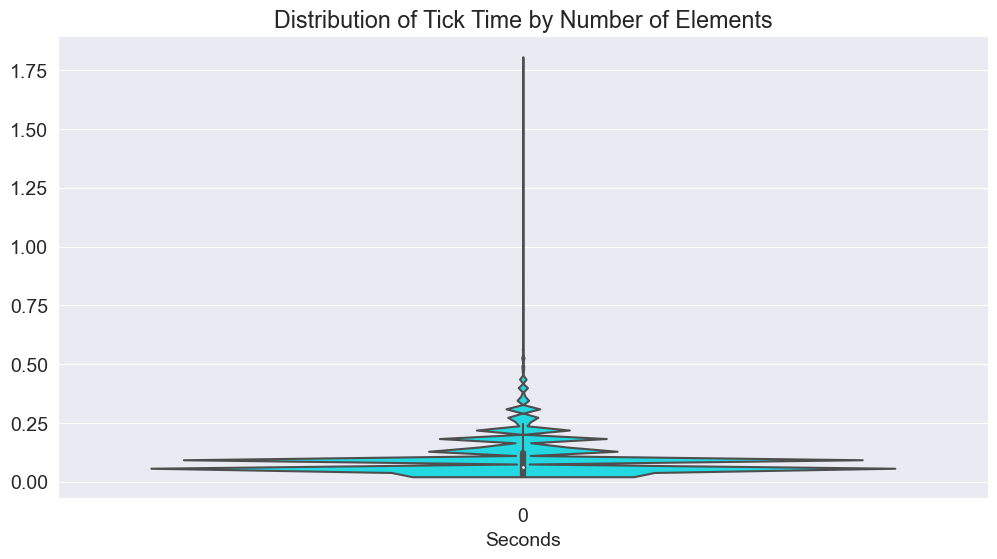

In [29]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Set up plot style
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
colors = ['#04f5ff','#e90052', '#00ff85', '#38003c']
sns.set_palette(sns.color_palette(colors));

In [ ]:
#Create a violin plot showing the distribution of minutes played by each element.
ax = sns.violinplot(data=lob_sample['Tick_Time'])
ax.set(title = 'Distribution of Tick Time by Number of Elements',
       xlabel ='Seconds');